### **Exercise1:**

Plot a rainbow

In [1]:
import numpy as np
import math
import itertools as it
from matplotlib import pyplot as plt

In [2]:
import seaborn as sb

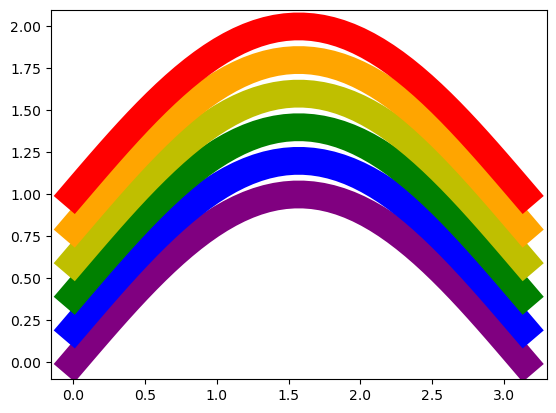

In [3]:
x = np.linspace(0,math.pi,50)
y1 = np.sin(x)
y2 = np.sin(x) + 0.2
y3 = np.sin(x) + 0.4
y4 = np.sin(x) + 0.6
y5 = np.sin(x) + 0.8
y6 = np.sin(x) + 1
plt.plot(x,y1,linewidth=20,color='purple')
plt.plot(x,y2,linewidth=20,color='b')
plt.plot(x,y3,linewidth=20,color='g')
plt.plot(x,y4,linewidth=20,color='y')
plt.plot(x,y5,linewidth=20, color='orange')
plt.plot(x,y6,linewidth=20,color='r')

### **Exercise2:**

Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

[0, 1, 3, 6, 2, 7, 13, 20, 12, 21, 11, 22, 10, 23, 9]


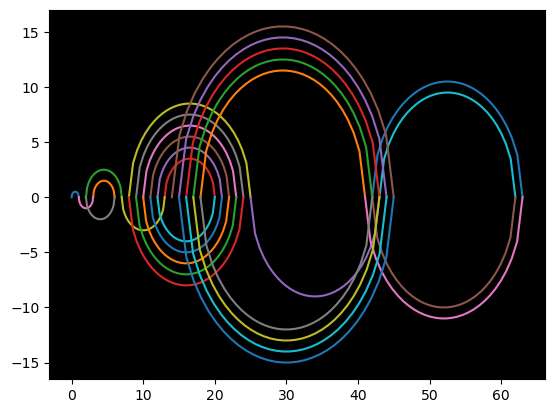

In [4]:
#add a set in which you check if temp is present.
#since there are no repetitions it should be faster
def recaman(n):
    """ Recaman sequence. Returns a_n = a_(n-1) - n
    if a_(n-1) - n > 0 and has not already appeared in the sequence,
    a_n = a_(n-1) + n otherwise, with a0 = 0 """
    result=[]
    result.append(0)
    for i in range(1,n):
        temp = result[i-1] - i    
        if temp > 0 and not temp in result:
            result.append(temp)
        else:
            result.append(result[i-1] + i)
    return result

seq = recaman(15)
print(seq)

def rec_plot(n):
    seq=[]
    seq = recaman(n)

    ax = plt.axes()
    ax.set_facecolor("black")
    
    for i in range(0,n-1,2):
        radius = abs(seq[i+1]-seq[i])/2
        x = np.linspace(seq[i], seq[i+1], 30)
        if seq[i] < seq[i+1]:
            y = np.sqrt(abs((radius**2) - (x-seq[i]-radius)**2))
        else:
            y = np.sqrt(abs((radius**2) - (x-seq[i+1]-radius)**2))
        plt.plot(x,y)
        
    for i in range(1,n-1,2):
        radius = abs(seq[i+1]-seq[i])/2
        x = np.linspace(seq[i], seq[i+1], 30)
        if seq[i] < seq[i+1]:
            y = -np.sqrt(abs((radius**2) - (x-seq[i]-radius)**2))
        else:
            y = -np.sqrt(abs((radius**2) - (x-seq[i+1]-radius)**2))
        plt.plot(x,y)
        
rec_plot(32)

### **Exercise3:**

Write a matrix multiplication fucntion using lists ("manually", like you did in c++) and another one using numpy arrays (call matmul function). Time them both. 

In [5]:
import timeit
#this is missing checks on input matrices
#they should be square matrices
def mult(A, B):
    sol=[]
    if len(A)==len(B):
        size = len(A)
        side = math.ceil(math.sqrt(len(A)))
        for a in range(0,side):
            for b in range(0,side):
                value = 0
                for i in range(0,side):
                    value += A[a*side +i]*B[i*side +b]
                sol.append(value)        
    else:
        print("Matrices are not of the same size!")

A = list(range(0,9))
B = list(range(0,9))
npA = np.array(range(0,9))
npB = np.array(range(0,9))

In [6]:
%%timeit
S = mult(A,B)

3.8 µs ± 62.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [7]:
%%timeit
np.matmul(npA,npB)

714 ns ± 19.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### **Exercise4:**

Read the "extra exercise from c++" about the Jacobi method to solve the Laplace equation. Implement the solver (without defining a class and just using numpy aray as a mesh) for the equation with the same boundary conditions. Try to get the same final picture and gif as the c++ version. Hint: you can plot a matrix with plt.imshow(MATRIX_TO_PLOT). The gif creation example scipt is in the file `anym.py` (not in the Jupyterlab as it has troubles displaying and sometimes even producing gifs, rememeber that you can export your notebooks into `.py` files by `Files->Export Notebook as... -> Export Notebook as executable script`)

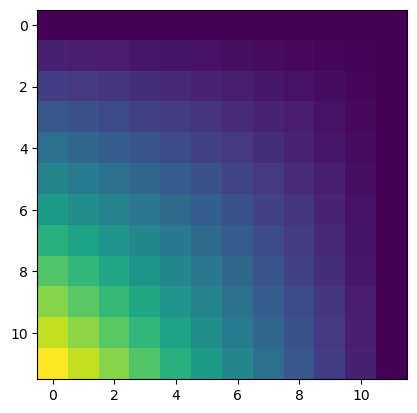

In [37]:
size = 10
step = 100/size
repetitions = 100
oldGrid = np.full((size+2, size+2), fill_value = 0.5)
newGrid = np.full((size+2, size+2), fill_value = 0.5)
def initialize(grid):
    for i in range(0, size+2):
        grid[0,i] = 0
        grid[i, size+1] = 0
        grid[size+1, i] = 110-step*i
        grid[i,0] = step*i 

def solver(old, new):
    index = 0
    for i in range(0,repetitions):
        for row in range(1,size+1):
            for col in range(1,size+1):
                new[row,col]=old[row+1,col]+old[row-1,col]+old[row,col+1]+old[row,col-1]
                new[row,col] *= 0.25
        old = new

initialize(oldGrid)
initialize(newGrid)
solver(oldGrid, newGrid)
#print(newGrid)
plt.imshow(newGrid)

### **Exercise5:**
Implement [Conway's game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) using numpy array to hold data and animation technique from the previous exercise (or any other if you know it).

### **Exercise6 (for those from data science following statistics course):**

Choose some howework from the statistics course that you've done in R and try to rewrite it using numpy.